# Tutorial Exercises

Here we explore the relationship between the binomial and normal distributions.

The last section looks at the question of how many repetitions we need to make a simulation a good match to the 'ground truth'

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

## Binomial: blindsight example

Warrington and Weiskrantz (1974) worked with a patient (called in their work by his initials, DB). DB had damage to the visual cortex of his brain, and reported no conscious vision, but Warrington and Weiskrantz noticed some hints that he could react to visual stimuli even though he was unaware of them, so they set up the following experiment:

Symbols are presented on a screen - 50% of symbols are X's and 50% are O's The patient guesses whether each symbol is an X or an O

If the patient gives the correct answer much more often than we would expect if he were guessing, we conclude that he has some redisual (unconsicous) vision

DB guessed correctly on 22 out of 30 trials. What can we conclude?

**Binomial model**

The number of correct guesses (out of 30) can be modelled using a binomial distribution:

$$x \sim \mathcal{B}(n,p)$$

The null and alterative hypotheses for the experiment are:

* $\mathcal{H_o}$: The patient was guessing, $x \sim \mathcal{B}(30, 0.5)$
* $\mathcal{H_a}$: The patient processed the symbols even though he had no conscious awareness of them

### Simulate the null hypothesis

Our 'null' hypothesis is the baseline against which we test our evidence. In this case, the null hypothesis is that DB was guessing and this would translate to a value for $p$ of 0.5

So we work out how likely it was to get 22 or more trials out of 30 correct given p=0.5, and this tells us how likely it was that the data could have arisen under the null hypothesis

* Why 22 or more?
* We would conclude that DB was not guessing if he got an unusually high number of trials correct. We need to determine a cutoff such that if he scored more than the cut-off, we would conclude he had some residual unconscious vision. It is logical that if 22/30 trials correct is sufficient evidence to reject the null, so is 23/30 and 24/30... 

Now use the PMF of the binomial to find the probabilty of obtaining 22 or more trials correct if guessing:

In [2]:
1 - stats.binom.cdf(21,30,0.5)

0.008062400855123997

The probability is 0.008 or less than 1%, so we can reject the null hypothesis

## How good is the Normal approximation to the binomial?

We have seen that the binomial distribution can be approximated by the normal distribution.

The fit is better when:
* $n$ is large
* $p$ is not close to 0 or 1

Furthermore, the two factors interact, so we can get away with $p$ closer to 0 or 1 when $n$ is larger.

The code block below creates and plots the binomial pmf and best-fit normal pdf.
* you will need to fill in some blanks to make it work!

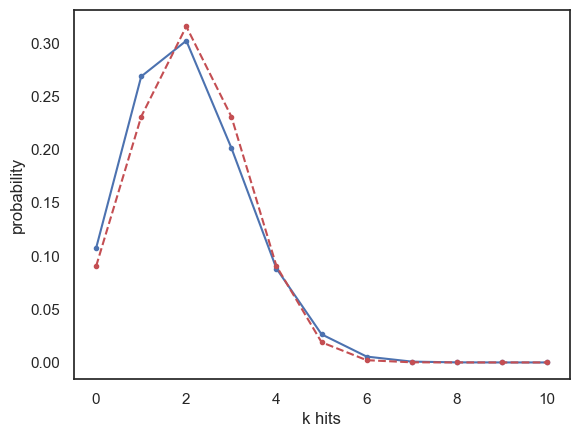

In [3]:
n = 10
p = 0.2

x = range(n+1)
binom = stats.binom.pmf(x,n,p)

mu = n*p # mean of normal distribution
sigma = (n*p*(1-p))**0.5 # std dev of normal distribution
norm = stats.norm.pdf(x,mu,sigma)

plt.plot(x, binom, 'b.-') # plot binomial PMF as blue line
plt.plot(x, norm, 'r.--') # plot normal PDF as red dashed line

plt.xlabel('k hits')
plt.ylabel('probability')
plt.show()


Now we will explore how good the fit is for different values of $n$ and $p$

* First try changing $p$, keeping $n$ set to 10.
    * set $p=0.5$*. This should give a good fit
    * set $p=0.2$*. Why is the fit not so good now?
    * what happens when $p=0.9$?
    
    
* Now, setting $p$ to 0.2, we will change $n$
    * Increase $n$ to 20 then to 100
    * The fit gets better as $n$ increases. Why?
    
Bear in mind that when $p$ is close to 0 or 1, not only do the blue and red lines not match well, but the best fitting normal distribution also predicts non-zero values for impossible numbers of hits (it is impossible for $k$ to be fewer than zero or more than $n$)

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/Chp9_NormApproxRange.png" width="85%"  />

## How many repetitions is enough?

For the binomial and normal distributions, we have seen how to work out the probability of a certain outcome (eg a certain value of $k$) using both *numerical methods* (simulation) and *analytic methods& (an equation).

An important difference between the two approaches is that using the equation (or `stats.binom.pmf()`) the answer is the same every time; in contrast, the numerical simulation depends on generating random numbers and will change slightly each time you run it.

For some data modelling problems, no equation (analystic solution) is available - an important example we have already met is permutation testing. 

Say we want to know the probability of getting 22/20 hits or more (in the blindsight example) - how many reps would we need in a simulation to match the answer from the equation to 2 significant figures?

Let's find out.

### Ground truth answer

First we use thhe equation to find out the probabilty of getting 22/30 or more:

In [4]:
1 - stats.binom.cdf(21,30,0.5)

0.008062400855123997

I make it 0.00806 to three significant figures

### Simulation

Now we run a simulation where we 'run' the experiment (30 trials) many times, assuming the null is true so 

$$k \sim \mathcal{B}(30,0.5)$$

In [5]:
nReps = 100000000
n = 30
p= 0.5

# Your code here to generate 10000 values of k
k = np.random.binomial(30,0.5,size=nReps)

# Your code here to find the proportion in which k>=22
np.mean(k>=22)

0.00805805

Hopefully the result you got was close to the ground truth result of 0.00806, but it was probably not a match to two significant figures (or maybe even to one).

This may be surprising when you see how well the simulation appears to match the predicted distribution overall:

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/Chp9_simfit.png" width="85%"  />

The problem is that we are interested in the very tail of the distribution and we don't expect many repetitions to result in values of k that fall in this tail. For example, we expect 54 out of 10000 reps to result in k==22. In fact, we got about 40 cases of k==22, which is an error of only 12 reps (out of 10,000), but it is also an error of over 20% (in the hheight of this particular bar):

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/Chp9_simfit_tail.png" width="85%"  />

So when we are interested in the tail of the distribution, as we often are (for example in permutation testing, when we are checking whether a result is in a tail of 5% or 1% of the null distribution) - we need a lot of repetitions to get an accurate result.

Adjust `nReps` in the code above until the simulated value of p(k>=22) reliably matches the ground truth value to 2 sinificant figures (ie if you run the code block several times does it match most of the time)?

* I think you need over a million reps to achieve this so if your computer is slow or you are working on colab you may need to give up!